In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('california_data.csv')
df

,Unnamed: 0,city,latd,longd,elevation_m,elevation_ft,population_total,area_total_sq_mi,area_land_sq_mi,area_water_sq_mi,area_total_km2,area_land_km2,area_water_km2,area_water_percent
0,0,Adelanto,34.576111,-117.432778,875.0,2871.0,31765,56.027,56.009,0.018,145.107,145.062,0.046,0.03
1,1,AgouraHills,34.153333,-118.761667,281.0,922.0,20330,7.822,7.793,0.029,20.260,20.184,0.076,0.37
2,2,Alameda,37.756111,-122.274444,NaN,33.0,75467,22.960,10.611,12.349,59.465,27.482,31.983,53.79
3,3,Albany,37.886944,-122.297778,NaN,43.0,18969,5.465,1.788,3.677,14.155,4.632,9.524,67.28
4,4,Alhambra,34.081944,-118.135000,150.0,492.0,83089,7.632,7.631,0.001,19.766,19.763,0.003,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,477,Yountville,38.403056,-122.362222,30.0,98.0,2933,1.531,1.531,0.000,3.966,3.966,0.000,0.00
478,478,Yreka,41.726667,-122.637500,787.0,2582.0,7765,10.053,9.980,0.073,26.036,25.847,0.188,0.72
479,479,YubaCity,39.134722,-121.626111,18.0,59.0,64925,14.656,14.578,0.078,37.959,37.758,0.201,0.53
480,480,Yucaipa,34.030278,-117.048611,798.0,2618.0,51367,27.893,27.888,0.005,72.244,72.231,0.013,0.02


C:\Users\44ong\AppData\Local\Temp\ipykernel_21888\758409894.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn');


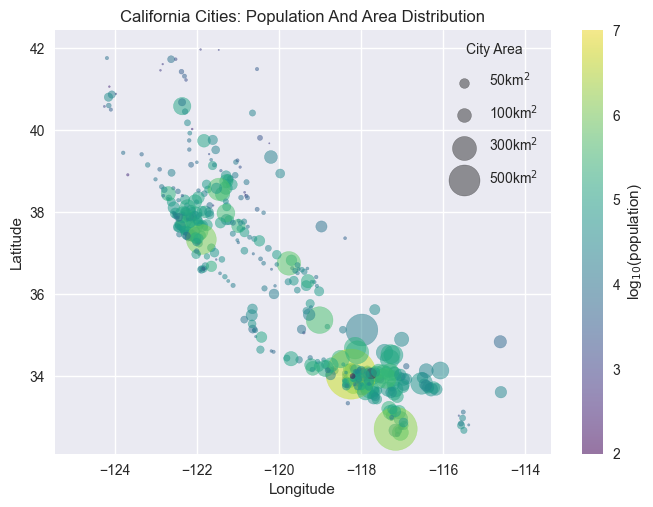

In [3]:
latd, longd = df['latd'], df['longd']
population = df['population_total']
area = df['area_total_km2']
plt.style.use('seaborn');
plt.scatter(longd, latd,s = area, c =np.log10(population),cmap = 'viridis', alpha = 0.5);
plt.axis('equal');
plt.xlabel('Longitude');
plt.ylabel('Latitude');
plt.colorbar(label = 'log$_{10}$(population)');
plt.clim(2,7)


# create a legend  for cities size
area_range = [50,100,300,500]
for area in area_range:
    plt.scatter([],[], s = area, label = str(area)+ 'km$^2$', c='k', alpha = 0.4)

plt.title("California Cities: Population And Area Distribution");
plt.legend(labelspacing = 1, title = 'City Area');

### Top 10 cities have area water the most in california

In [5]:
area_water = df['area_water_km2'].sort_values(ascending = False).head(10)
area_water

367    122.270
239     88.000
285     75.557
93      64.062
104     59.536
387     58.275
345     58.048
290     57.540
418     54.435
446     48.800
Name: area_water_km2, dtype: float64

In [6]:
temp = df.sort_values('area_water_km2',ascending = False).head(10)
name = temp['city']
name

367             SanDiego
239           LosAngeles
285         NewportBeach
93              Coronado
104            DanaPoint
387         SantaBarbara
345             Richmond
290              Oakland
418    SouthSanFrancisco
446              Vallejo
Name: city, dtype: object

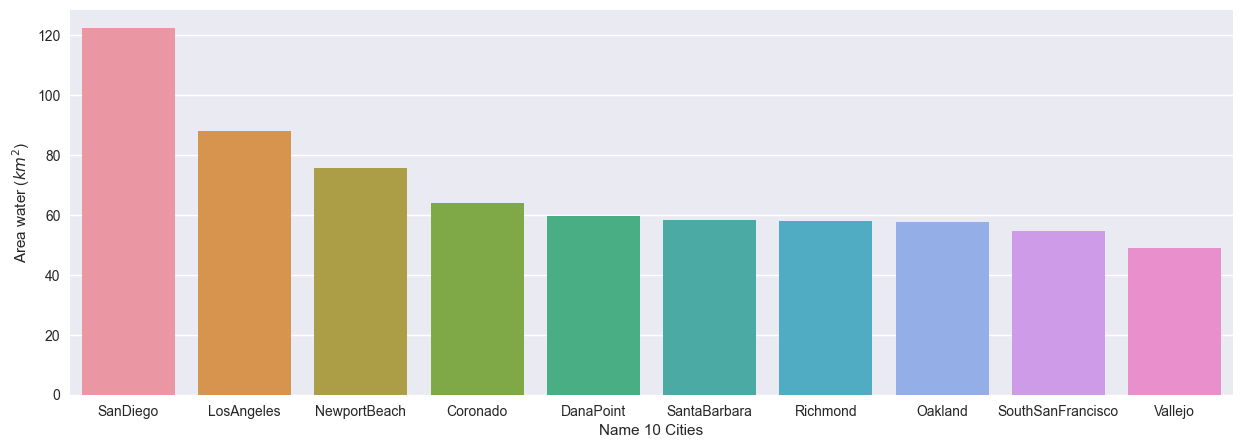

In [10]:
fig, ax = plt.subplots(figsize = (15,5));
sns.barplot(x = name, y = area_water);
plt.xlabel("Name 10 Cities");
plt.ylabel("Area water ($km^2$)");